In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
import seaborn as sns
import matplotlib as cm
import matplotlib.pyplot as plt
import altair as alt
from vega_datasets import data
from math import log10
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")
from PIL import Image

# Importar datos

Datos extraídos de la fuente 'Datos.gob.ar'

Fecha creación: 10 de Febrero de 2017

Datos actualizados por última vez: 10 de Febrero de 2017

Fuente: [Kaggle](https://www.kaggle.com/murderaccountability/homicide-reports/metadata)  

In [2]:
datos = pd.read_csv("C:/Users/David Benavides/Documents/Visualización de datos/database.csv",sep=";")
datos.head()

Record ID Agency Code Agency Name       Agency Type       City   State  \
0          1     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
1          2     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
2          3     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
3          4     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
4          5     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   

   Year    Month  Incident              Crime Type Crime Solved Victim Sex  \
0  1980  January         1  Murder or Manslaughter          Yes       Male   
1  1980    March         1  Murder or Manslaughter          Yes       Male   
2  1980    March         2  Murder or Manslaughter           No     Female   
3  1980    April         1  Murder or Manslaughter          Yes       Male   
4  1980    April         2  Murder or Manslaughter           No     Female   

   Victim Age                    Victim Race Victim Ethnicity Perpetrator Sex  \
0          14  Native American/Alaska Native          Unknown            Male   
1          43                          White          Unknown            Male   
2          30  Native American/Alaska Native          Unknown         Unknown   
3          43                          White          Unknown            Male   
4          30  Native American/Alaska Native          Unknown         Unknown   

  Perpetrator Age               Perpetrator Race Perpetrator Ethnicity  \
0              15  Native American/Alaska Native               Unknown   
1              42                          White               Unknown   
2               0                        Unknown               Unknown   
3              42                          White               Unknown   
4               0                        Unknown               Unknown   

   Relationship         Weapon  Victim Count  Perpetrator Count Record Source  
0  Acquaintance   Blunt Object             0                  0           FBI  
1  Acquaintance  Strangulation             0                  0           FBI  
2       Unknown        Unknown             0                  0           FBI  
3  Acquaintance  Strangulation             0                  0           FBI  
4       Unknown        Unknown             0                  1           FBI

## Descripción de los datos

El Murder Accountability Project es la base de datos más completa de homicidios disponible actualmente en los Estados Unidos. Este conjunto de datos incluye asesinatos del Informe Suplementario de Homicidios del FBI desde 1976 hasta el presente y datos de la Ley de Libertad de Información sobre más de 22,000 homicidios que no fueron reportados al Departamento de Justicia. Este conjunto de datos incluye la edad, raza, sexo, origen étnico de las víctimas y los perpetradores, además de la relación entre la víctima y el perpetrador y el arma utilizada.

* Record ID: ID de registro
* Agency Code: Código de agencia
* Agency Name: Nombre de agencia
* Agency Type: Tipo de agencia
* City: Ciudad
* State: Estado
* Year: Año
* Month: Mes
* Incident: Incidente
* Crime Type: Tipo de delito
* Crime Solved: Crimen resuelto
* Victim Sex: Víctima Sexo
* Victim Age: Edad de la víctima
* Victim Raza: Raza de víctimas
* Victim Ethnicity: Etnia de la víctima
* Perpetrator Sex: Perpetrador Sexo
* Perpetrator Age: Edad del perpetrador
* Perpetrator Race: Raza del perpetra
* Perpetrator Ethnicity: Etnia del perpetrador
* Relationship: Relación
* Weapon: Arma
* Victim Count: Recuento de víctimas
* Perpetrator Count: Recuento de perpetradores
* Record Source: Fuente de registro

In [3]:
datos.dtypes

Record ID                 int64
Agency Code              object
Agency Name              object
Agency Type              object
City                     object
State                    object
Year                      int64
Month                    object
Incident                  int64
Crime Type               object
Crime Solved             object
Victim Sex               object
Victim Age                int64
Victim Race              object
Victim Ethnicity         object
Perpetrator Sex          object
Perpetrator Age          object
Perpetrator Race         object
Perpetrator Ethnicity    object
Relationship             object
Weapon                   object
Victim Count              int64
Perpetrator Count         int64
Record Source            object
dtype: object

In [4]:
datos.shape

(638454, 24)

In [5]:
datos1=datos
datos1.index=datos1["Record ID"]
datos1.drop(['Record ID'], axis=1)
datos1.head()

Record ID Agency Code Agency Name       Agency Type       City  \
Record ID                                                                   
1                  1     AK00101   Anchorage  Municipal Police  Anchorage   
2                  2     AK00101   Anchorage  Municipal Police  Anchorage   
3                  3     AK00101   Anchorage  Municipal Police  Anchorage   
4                  4     AK00101   Anchorage  Municipal Police  Anchorage   
5                  5     AK00101   Anchorage  Municipal Police  Anchorage   

            State  Year    Month  Incident              Crime Type  \
Record ID                                                            
1          Alaska  1980  January         1  Murder or Manslaughter   
2          Alaska  1980    March         1  Murder or Manslaughter   
3          Alaska  1980    March         2  Murder or Manslaughter   
4          Alaska  1980    April         1  Murder or Manslaughter   
5          Alaska  1980    April         2  Murder or Manslaughter   

          Crime Solved Victim Sex  Victim Age                    Victim Race  \
Record ID                                                                      
1                  Yes       Male          14  Native American/Alaska Native   
2                  Yes       Male          43                          White   
3                   No     Female          30  Native American/Alaska Native   
4                  Yes       Male          43                          White   
5                   No     Female          30  Native American/Alaska Native   

          Victim Ethnicity Perpetrator Sex Perpetrator Age  \
Record ID                                                    
1                  Unknown            Male              15   
2                  Unknown            Male              42   
3                  Unknown         Unknown               0   
4                  Unknown            Male              42   
5                  Unknown         Unknown               0   

                        Perpetrator Race Perpetrator Ethnicity  Relationship  \
Record ID                                                                      
1          Native American/Alaska Native               Unknown  Acquaintance   
2                                  White               Unknown  Acquaintance   
3                                Unknown               Unknown       Unknown   
4                                  White               Unknown  Acquaintance   
5                                Unknown               Unknown       Unknown   

                  Weapon  Victim Count  Perpetrator Count Record Source  
Record ID                                                                
1           Blunt Object             0                  0           FBI  
2          Strangulation             0                  0           FBI  
3                Unknown             0                  0           FBI  
4          Strangulation             0                  0           FBI  
5                Unknown             0                  1           FBI

In [6]:
datos1.isnull().sum()

Record ID                0
Agency Code              0
Agency Name              0
Agency Type              0
City                     0
State                    0
Year                     0
Month                    0
Incident                 0
Crime Type               0
Crime Solved             0
Victim Sex               0
Victim Age               0
Victim Race              0
Victim Ethnicity         0
Perpetrator Sex          0
Perpetrator Age          0
Perpetrator Race         0
Perpetrator Ethnicity    0
Relationship             0
Weapon                   0
Victim Count             0
Perpetrator Count        0
Record Source            0
dtype: int64

In [7]:
datos1

Record ID Agency Code      Agency Name       Agency Type  \
Record ID                                                             
1                  1     AK00101        Anchorage  Municipal Police   
2                  2     AK00101        Anchorage  Municipal Police   
3                  3     AK00101        Anchorage  Municipal Police   
4                  4     AK00101        Anchorage  Municipal Police   
5                  5     AK00101        Anchorage  Municipal Police   
...              ...         ...              ...               ...   
638450        638450     WY01500      Park County           Sheriff   
638451        638451     WY01700  Sheridan County           Sheriff   
638452        638452     WY01701         Sheridan  Municipal Police   
638453        638453     WY01800  Sublette County           Sheriff   
638454        638454     WY01902     Rock Springs  Municipal Police   

                 City    State  Year      Month  Incident  \
Record ID                                                   
1           Anchorage   Alaska  1980    January         1   
2           Anchorage   Alaska  1980      March         1   
3           Anchorage   Alaska  1980      March         2   
4           Anchorage   Alaska  1980      April         1   
5           Anchorage   Alaska  1980      April         2   
...               ...      ...   ...        ...       ...   
638450           Park  Wyoming  2014    January         1   
638451       Sheridan  Wyoming  2014       June         1   
638452       Sheridan  Wyoming  2014  September         1   
638453       Sublette  Wyoming  2014   December         1   
638454     Sweetwater  Wyoming  2014  September         1   

                       Crime Type Crime Solved Victim Sex  Victim Age  \
Record ID                                                               
1          Murder or Manslaughter          Yes       Male          14   
2          Murder or Manslaughter          Yes       Male          43   
3          Murder or Manslaughter           No     Female          30   
4          Murder or Manslaughter          Yes       Male          43   
5          Murder or Manslaughter           No     Female          30   
...                           ...          ...        ...         ...   
638450     Murder or Manslaughter           No       Male          30   
638451     Murder or Manslaughter          Yes       Male          62   
638452     Murder or Manslaughter          Yes     Female           0   
638453     Murder or Manslaughter          Yes       Male          55   
638454     Murder or Manslaughter          Yes     Female           0   

                             Victim Race Victim Ethnicity Perpetrator Sex  \
Record ID                                                                   
1          Native American/Alaska Native          Unknown            Male   
2                                  White          Unknown            Male   
3          Native American/Alaska Native          Unknown         Unknown   
4                                  White          Unknown            Male   
5          Native American/Alaska Native          Unknown         Unknown   
...                                  ...              ...             ...   
638450                             White         Hispanic         Unknown   
638451                             White          Unknown            Male   
638452            Asian/Pacific Islander          Unknown          Female   
638453                             White     Not Hispanic            Male   
638454                             White     Not Hispanic          Female   

          Perpetrator Age               Perpetrator Race  \
Record ID                                                  
1                      15  Native American/Alaska Native   
2                      42                          White   
3                       0                        Unknown   
4                      42                

In [8]:
datos2=datos1[datos1.iloc[:,21]!=0] #Eliminación de las filas número de victimas ya que dice que son 0

In [9]:
datos2=datos2[datos2.iloc[:,22]!=0]

In [10]:
datos2.iloc[:,21].value_counts()

1     8899
2     1469
3      584
4      184
10     160
5       72
6       69
7       24
9       20
Name: Victim Count, dtype: int64

In [11]:
datos2.iloc[:,22].value_counts()

1     8045
2     2033
3     1068
4      165
5       74
6       30
9       24
7       19
8       12
10      11
Name: Perpetrator Count, dtype: int64

In [12]:
datos2=datos2[datos2.iloc[:,15]!=0]
datos2=datos2[datos2.iloc[:,15]!=1]
datos2=datos2[datos2.iloc[:,15]!=2]
datos2=datos2[datos2.iloc[:,15]!=3]
datos2=datos2[datos2.iloc[:,15]!=4]
datos2=datos2[datos2.iloc[:,15]!=5]
datos2=datos2[datos2.iloc[:,15]!=6]
datos2=datos2[datos2.iloc[:,15]!=7]
datos2=datos2[datos2.iloc[:,15]!=8]
datos2=datos2[datos2.iloc[:,15]!=9]
#Eliminación de la columna edad de los perpetradores debido a que tome la decisión de que ya que existe en 
#el tipo de crimen la opcion de homicidio no culposo (si lo investigue y es involuntario es como cuando vas distraido
#conduciendo y matas a alguien, te culpan de eso) asi que considere que de 10 años para arriba esta abierta esa opción
#igual si quieres poner digamos de 7 para adelante solo es eliminar la linea que tiene el 8 y 9. Pero yo creo que esta
#bien asi porque en USA pues lastimosamente hay crimenes de niños con armas en casa y puede que jugando pues hay
#homicidio no voluntario por negligencia

In [13]:
datos2

Record ID Agency Code          Agency Name       Agency Type  \
Record ID                                                                 
174              174     AL00118             Brighton  Municipal Police   
175              175     AL00118             Brighton  Municipal Police   
191              191     AL00201               Mobile  Municipal Police   
224              224     AL00201               Mobile  Municipal Police   
346              346     AL01800             Cleburne           Sheriff   
...              ...         ...                  ...               ...   
638357        638357     WIMPD00            Milwaukee  Municipal Police   
638372        638372     WV01000       Fayette County           Sheriff   
638374        638374     WV01000       Fayette County           Sheriff   
638435        638435     WVWSP55  State Police: Welch      State Police   
638436        638436     WVWSP55  State Police: Welch      State Police   

                City          State  Year     Month  Incident  \
Record ID                                                       
174        Jefferson        Alabama  1980  December         1   
175        Jefferson        Alabama  1980  December         1   
191           Mobile        Alabama  1980      July         3   
224           Mobile        Alabama  1980      July         3   
346         Cleburne        Alabama  1980   January         1   
...              ...            ...   ...       ...       ...   
638357     Milwaukee      Wisconsin  2014  December         2   
638372       Fayette  West Virginia  2014     March         1   
638374       Fayette  West Virginia  2014     March         1   
638435      McDowell  West Virginia  2014   October         1   
638436      McDowell  West Virginia  2014   October         1   

                       Crime Type Crime Solved Victim Sex  Victim Age  \
Record ID                                                               
174        Murder or Manslaughter          Yes       Male          24   
175        Murder or Manslaughter          Yes       Male          18   
191        Murder or Manslaughter          Yes       Male          50   
224        Murder or Manslaughter          Yes       Male          38   
346        Murder or Manslaughter           No       Male          79   
...                           ...          ...        ...         ...   
638357     Murder or Manslaughter           No       Male          19   
638372     Murder or Manslaughter          Yes     Female           1   
638374     Murder or Manslaughter          Yes       Male           0   
638435     Murder or Manslaughter          Yes       Male          50   
638436     Murder or Manslaughter          Yes       Male          21   

          Victim Race Victim Ethnicity Perpetrator Sex Perpetrator Age  \
Record ID                                                                
174             Black          Unknown            Male              22   
175             Black          Unknown            Male              22   
191             White     Not Hispanic            Male              24   
224             White     Not Hispanic            Male              24   
346             White          Unknown         Unknown               0   
...               ...              ...             ...             ...   
638357          Black          Unknown         Unknown               0   
638372          White          Unknown            Male              27   
638374          White          Unknown            Male              27   
638435          White          Unknown          Female              35   
638436          White          Unknown          Female              35   

          Perpetrator Race Perpetrator Ethnicity  Relationship   Weapon  \
Record ID                                                                 
174                  Black               Unknown  Acquaintance  Shotgun   
175                  Black               Unknown  A

In [14]:
#datos2.iloc[:,15]=pd.to_numeric(datos2.iloc[:,15])
datos2.iloc[:,15].value_counts()

Male       8359
Unknown    2658
Female      464
Name: Perpetrator Sex, dtype: int64

In [15]:
datos2.iloc[:,19].replace({"Girlfriend":"Boyfriend/Girlfriend","Boyfriend":"Boyfriend/Girlfriend"},inplace=True)

In [16]:
datos2.shape

(11481, 24)

In [17]:
datos2=datos2.iloc[:,1:24]
datos2=datos2[datos2['Victim Age']!=998]

In [18]:
datos2.columns

Index(['Agency Code', 'Agency Name', 'Agency Type', 'City', 'State', 'Year',
       'Month', 'Incident', 'Crime Type', 'Crime Solved', 'Victim Sex',
       'Victim Age', 'Victim Race', 'Victim Ethnicity', 'Perpetrator Sex',
       'Perpetrator Age', 'Perpetrator Race', 'Perpetrator Ethnicity',
       'Relationship', 'Weapon', 'Victim Count', 'Perpetrator Count',
       'Record Source'],
      dtype='object')

# Visualizciones David Benavides

# Multivariado

<Figure size 1440x2160 with 0 Axes>

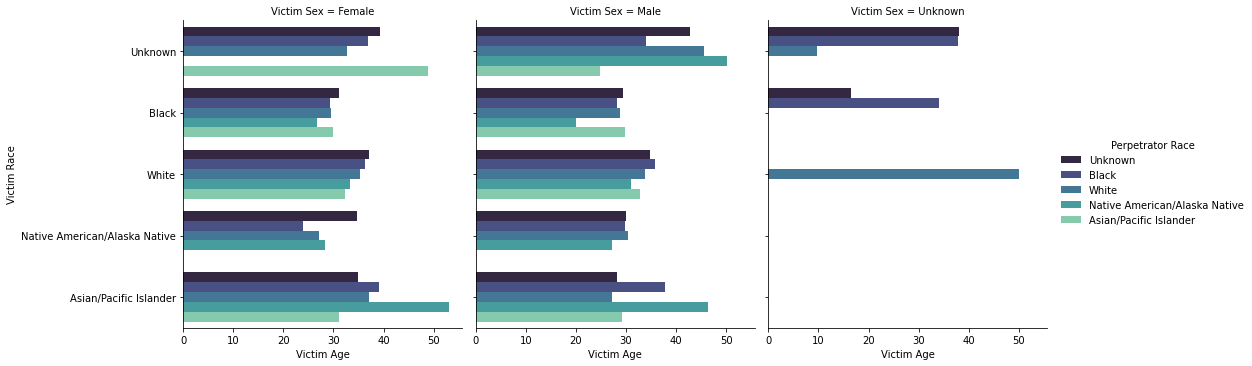

In [16]:
plt.figure(figsize=[20,30])
sns.catplot(data = datos2,
            kind = "bar",
            estimator = np.mean,
            x = 'Victim Age', 
            y = 'Victim Race',
            hue = 'Perpetrator Race',
            col = 'Victim Sex',
            palette = 'mako',
            ci = None)

## ¿Que?
Los datos que se presentan en esta visualización son la edad promedio de las personas que fueron victima de homicidio entre los años 1980 y 2014 que estan en el eje horizontal o eje X, en el eje Y o eje vertical esta la variable raza de la victima que se divide en 5 categorias y por ultimo a traves de barras de colores esta la raza del perpetrador. Y por ultimo se separa en sexo en 3 diferentes gráficos.

## ¿Por que?
Identificar relaciones entre las razas de los perpetradores, para identificar si existe algun tipo de relación visual, tambien poder observar si hay alguna distinción de género en los homicidios teniendo en cuenta lo anteiriormente descrito y a la vez que edad es promedio por sexo y raza.

## ¿Como?
La visualización no requiere de una interacción con los usuarios ya que son datos fijos que cumplen su proposito de expresar y comparar los promedios por sexo y raza.

## Marca
La marca implementada en esta visualización es de barras ya que con ellas se expresa la cantidad promedio de las edades a traves de las mismas en cada categoria de la raza de la victima.

## Canal
El canal implementado es el de color ya que con este mismo se pueden identificar las razas de los perpetradores en las barras de los promedios, con el fin de separarlos por la misma variable en cada una de sus categorias.

## Posibles Mejoras
La posible mejora para esta visualización seria la de colocar etiquetas en cada barra de promedio con el fin de que el usuario puede identificar fácilmente las cantidades del promedio.

# Temporal

In [17]:
temp=pd.crosstab(datos2['Month'],datos2['Year']).T
temp=temp.reindex(columns=['January','February','March','April','May','June','July','August','September','October','November','December'])
temp=temp.iloc[25:35,]
temp

Month  January  February  March  April  May  June  July  August  September  \
Year                                                                         
2005       143       133    117    120  155   135   128     131        114   
2006       141        87    119    154  118   129   168     104        143   
2007       145       101    109    151  140   146   134     125        142   
2008        99       142    167    128  117   160   103     105        103   
2009       112       117    127    144  126   146   165     147        149   
2010       150        83    115    132  153   113   119     120        128   
2011       145       104    133    141  139   126   130     108        140   
2012       133       122    113    163  144   130   186     145        103   
2013       112       126    122    129  137   137   152     122        117   
2014       124        81    105    106  137    86   123     114        112   

Month  October  November  December  
Year                                
2005       104       136       136  
2006       158       109       158  
2007       108       105       157  
2008       156       100       125  
2009       108       144       121  
2010       102       136       110  
2011       118       112       131  
2012       114        97       151  
2013       137       147       113  
2014       117       103       104

In [18]:
from math import pi
meses=list(temp)[0:]
N=len(meses)
maxnum = temp[meses].values.max()
maxnum

186

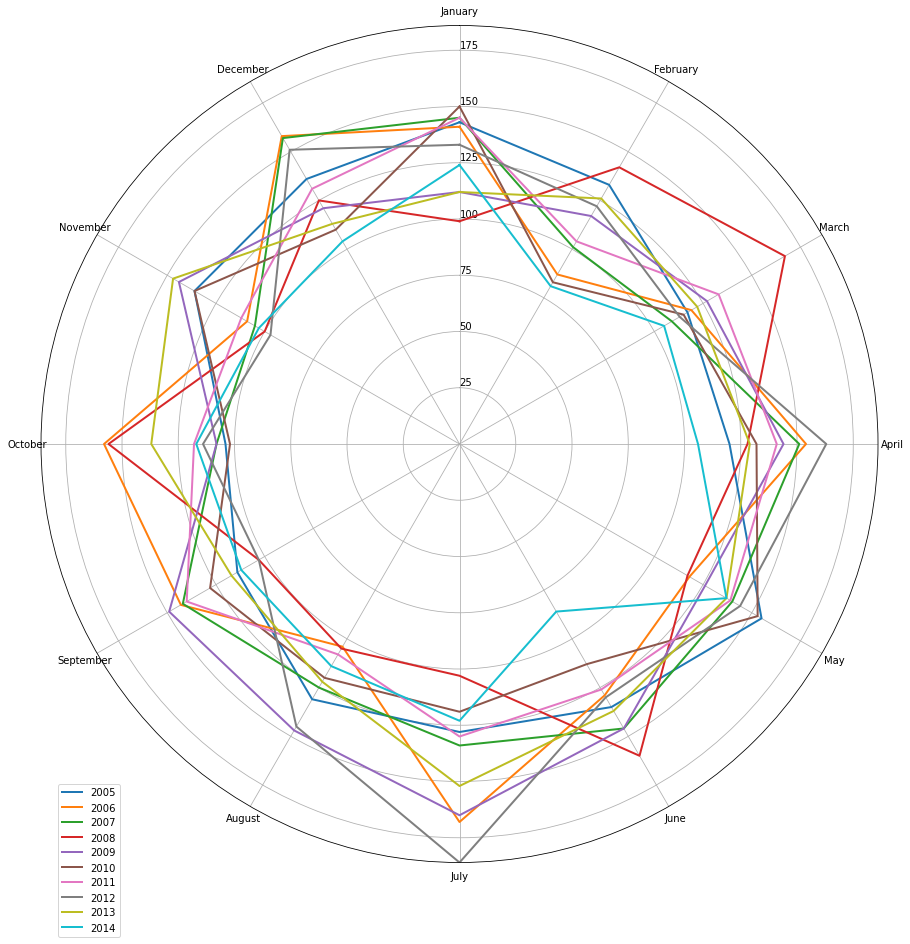

In [19]:
plt.figure(figsize=[15,25])
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1) 
plt.xticks(angles[:-1], meses)
ax.set_rlabel_position(0)
plt.ylim(0,maxnum)
year=temp.index

for i in range(0,10,1):
    values=[]
    values=temp.iloc[i].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=str(year[i]))
    
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))


## ¿Que?
Los datos que el usuario puede encontrar en este gráfico son diferentes lineas que representan la cantidad de casos de homicidios de cada año entre los años 2005 y 2014, esta visualización circular tiene 12 ejes que representan los meses del año y la cuenta de homicidios de cada mes.

## ¿Por que?
Identificar diferencias en cada uno de los años entre el 2005 y 2014, cada año al ser representado con una linea diferente tiene el objetivo de que a traves de los meses el usuario pueda observar la evolución de la cantidad y comparar asi cada mes de un año con el mismo mes de otro año.

## ¿Como?
El usuario no requiere interactuar con la visualización debido a que son datos que no son dificiles de identificar a simple vista y que a traves de los diferentes colores que hay ningun año se confunde fácilmente con otro.

## Marca
La marca implementada es de lineas ya que con estas podemos ver el avance a traves del tiempo y como crece o decrece la cantidad de homicidios en cada año a traves de los meses.

## Canal
El canal que se uso es el de color ya que con los colores implementados para cada año es posible distinguir un año del otro y asi observar su progreso.

## Posibles mejoras
La posible mejora podría ser el agregar etiquetas a los picos que alcanza cada linea en los ejes, con el fin de que para el usuario pueda observar las cantidades expresadas en los picos.

# Espacial

In [25]:
espacial=datos2[datos2['Year']>2004]

In [26]:
espacial['State'].value_counts()

California              274
Texas                   252
Michigan                200
Louisiana               174
South Carolina          169
North Carolina          160
Ohio                    151
Florida                 147
Georgia                 122
Tennessee               121
Pennsylvania            103
Virginia                 98
Indiana                  94
New York                 92
Maryland                 85
Missouri                 84
Illinois                 74
Washington               69
Arizona                  62
Arkansas                 60
Oklahoma                 46
New Jersey               44
Kentucky                 43
Colorado                 41
Mississippi              40
Wisconsin                38
Nevada                   34
Connecticut              31
New Mexico               30
Minnesota                29
Massachusetts            25
Kansas                   20
West Virginia            15
Nebraska                 15
Oregon                   14
Delaware            

In [27]:
espacial['Abreviatura']=np.zeros(len(espacial))
for i in range(0,len(espacial),1):
    if espacial['State'].iloc[i]=='Texas':
        espacial['Abreviatura'].iloc[i]='TX'
    if espacial['State'].iloc[i]=='California':
        espacial['Abreviatura'].iloc[i]='CA'
    if espacial['State'].iloc[i]=='Florida':
        espacial['Abreviatura'].iloc[i]='FL'
    if espacial['State'].iloc[i]=='North Carolina':
        espacial['Abreviatura'].iloc[i]='NC'
    if espacial['State'].iloc[i]=='New York':
        espacial['Abreviatura'].iloc[i]='NY'
    if espacial['State'].iloc[i]=='Georgia':
        espacial['Abreviatura'].iloc[i]='GA'
    if espacial['State'].iloc[i]=='Michigan':
        espacial['Abreviatura'].iloc[i]='MI'
    if espacial['State'].iloc[i]=='Missouri':
        espacial['Abreviatura'].iloc[i]='MO'
    if espacial['State'].iloc[i]=='Pennsylvania':
        espacial['Abreviatura'].iloc[i]='PA'
    if espacial['State'].iloc[i]=='Ohio':
        espacial['Abreviatura'].iloc[i]='OH'
    if espacial['State'].iloc[i]=='South Carolina':
        espacial['Abreviatura'].iloc[i]='SC'
    if espacial['State'].iloc[i]=='Virginia':
        espacial['Abreviatura'].iloc[i]='VA'
    if espacial['State'].iloc[i]=='Louisiana':
        espacial['Abreviatura'].iloc[i]='LA'
    if espacial['State'].iloc[i]=='Tennessee':
        espacial['Abreviatura'].iloc[i]='TN'
    if espacial['State'].iloc[i]=='Indiana':
        espacial['Abreviatura'].iloc[i]='IN'
    if espacial['State'].iloc[i]=='Arkansas':
        espacial['Abreviatura'].iloc[i]='AR'
    if espacial['State'].iloc[i]=='Colorado':
        espacial['Abreviatura'].iloc[i]='CO'
    if espacial['State'].iloc[i]=='Washington':
        espacial['Abreviatura'].iloc[i]='WA'
    if espacial['State'].iloc[i]=='Oklahoma':
        espacial['Abreviatura'].iloc[i]='OK'
    if espacial['State'].iloc[i]=='Illinois':
        espacial['Abreviatura'].iloc[i]='IL'
    if espacial['State'].iloc[i]=='Utah':
        espacial['Abreviatura'].iloc[i]='UT'
    if espacial['State'].iloc[i]=='Maryland':
        espacial['Abreviatura'].iloc[i]='MD'
    if espacial['State'].iloc[i]=='New Jersey':
        espacial['Abreviatura'].iloc[i]='NJ'
    if espacial['State'].iloc[i]=='Arizona':
        espacial['Abreviatura'].iloc[i]='AZ'
    if espacial['State'].iloc[i]=='Wisconsin':
        espacial['Abreviatura'].iloc[i]='WI'
    if espacial['State'].iloc[i]=='Mississippi':
        espacial['Abreviatura'].iloc[i]='MS'
    if espacial['State'].iloc[i]=='West Virginia':
        espacial['Abreviatura'].iloc[i]='WV'
    if espacial['State'].iloc[i]=='New Mexico':
        espacial['Abreviatura'].iloc[i]='NM'
    if espacial['State'].iloc[i]=='District of Columbia':
        espacial['Abreviatura'].iloc[i]='DC'
    if espacial['State'].iloc[i]=='Nevada':
        espacial['Abreviatura'].iloc[i]='NV'
    if espacial['State'].iloc[i]=='Maine':
        espacial['Abreviatura'].iloc[i]='ME'
    if espacial['State'].iloc[i]=='Iowa':
        espacial['Abreviatura'].iloc[i]='IA'
    if espacial['State'].iloc[i]=='Idaho':
        espacial['Abreviatura'].iloc[i]='ID'
    if espacial['State'].iloc[i]=='Montana':
        espacial['Abreviatura'].iloc[i]='MT'
    if espacial['State'].iloc[i]=='Kansas':
        espacial['Abreviatura'].iloc[i]='KS'
    if espacial['State'].iloc[i]=='Alaska':
        espacial['Abreviatura'].iloc[i]='AK'
    if espacial['State'].iloc[i]=='Kentucky':
        espacial['Abreviatura'].iloc[i]='KY'
    if espacial['State'].iloc[i]=='Massachusetts':
        espacial['Abreviatura'].iloc[i]='MA'
    if espacial['State'].iloc[i]=='Minnesota':
        espacial['Abreviatura'].iloc[i]='MN'
    if espacial['State'].iloc[i]=='Vermont':
        espacial['Abreviatura'].iloc[i]='VT'
    if espacial['State'].iloc[i]=='South Dakota':
        espacial['Abreviatura'].iloc[i]='SD'
    if espacial['State'].iloc[i]=='Oregon':
        espacial['Abreviatura'].iloc[i]='OR'
    if espacial['State'].iloc[i]=='Delaware':
        espacial['Abreviatura'].iloc[i]='DE'
    if espacial['State'].iloc[i]=='New Hampshire':
        espacial['Abreviatura'].iloc[i]='NH'
    if espacial['State'].iloc[i]=='Nebraska':
        espacial['Abreviatura'].iloc[i]='NE'
    if espacial['State'].iloc[i]=='Hawaii':
        espacial['Abreviatura'].iloc[i]='HI'
    if espacial['State'].iloc[i]=='Alabama':
        espacial['Abreviatura'].iloc[i]='AL'
    if espacial['State'].iloc[i]=='Connecticut':
        espacial['Abreviatura'].iloc[i]='CT'
    if espacial['State'].iloc[i]=='Connecticut':
        espacial['Abreviatura'].iloc[i]='CT'
    if espacial['State'].iloc[i]=='North Dakota':
        espacial['Abreviatura'].iloc[i]='ND'
    if espacial['State'].iloc[i]=='Rhodes Island':
        espacial['Abreviatura'].iloc[i]='RI'
    if espacial['State'].iloc[i]=='Rhodes Island':
        espacial['Abreviatura'].iloc[i]='RI'
    if espacial['State'].iloc[i]=='Wyoming':
        espacial['Abreviatura'].iloc[i]='WY'
        

In [28]:
l=espacial['Abreviatura'].value_counts()
m=espacial['State'].value_counts()
fig = go.Figure(data=go.Choropleth(
    locations=l.index,
    z=l.values.astype(float),
    locationmode='USA-states',
    colorscale='YlGnBu',
    autocolorscale=False,
    marker_line_color='white', 
    colorbar_title="Cantidad de casos",
    hovertext=m.index
))

fig.update_layout(
    title_text='Número de casos de homicidios entre los años 2005 a 2014',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()

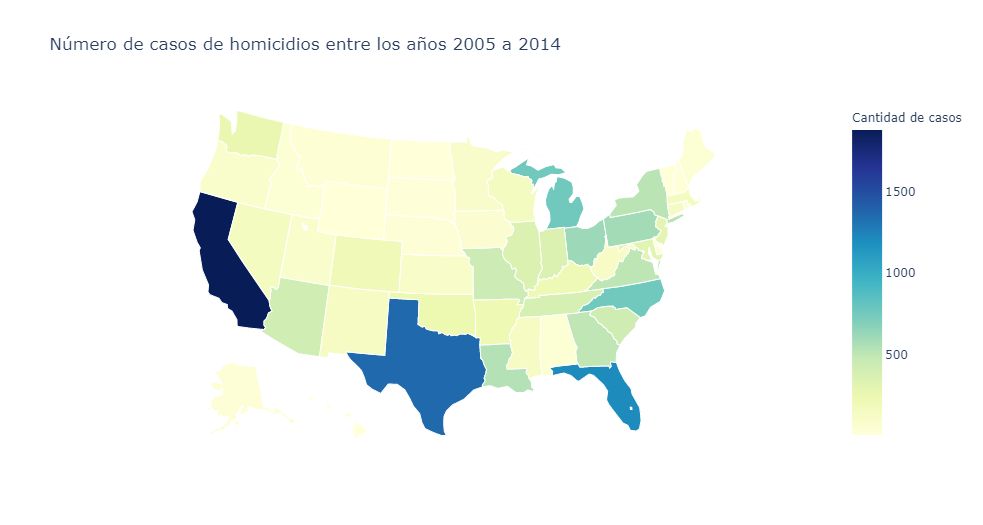

In [32]:
from IPython.display import Image
Image("C:/Users/David Benavides/Documents/Visualización de datos/Vis Espacial David.png")

## ¿Que?
Los datos que se pueden observar en esta visualización es la cantidad de homicidios reportados entre los años 2005 y 2014, separado por estado y se usan los colores para poder identificar en que estados hubo más casos de homicidios.

## ¿Por que?
Reconocer gráficamente en que estados hubo más homicidios entre los años 2005 a 2014 y usando la degradación de color poder identificar en que estados la cantidad de homicidios es mayor

## ¿Como?
La interacción que tiene el usuario con esta visualización es que al usar cursor para seleccionar algun estado que se quiera saber la cantidad de homicidios entonces aparecera una etiqueta con la cantidad de homicidios entre los años 2005 a 2014.

## Marca
La marca de este canal es de posición ya que con ella podemos identificar los estados en el pais de Estados Unidos utilizando un mapa.

## Canal
El canal implementado es el de color ya que con este el usuario identifica en que estado hubo más homicidios y en cuales no, usando la degradación del color.

## Posibles mejoras
La posible mejora para esta visualización es que de tener coordenadas más exactas para cada ciudad en la que se reporto el homicidio se podria hacer con circulos identificando en que partes más especificas del pais pasaron.

# Visualizciones Luz Adriana Rodriguez Padilla

# Multivariado

In [228]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import altair as alt
from vega_datasets import data
pd.set_option('display.max_columns', None) #Mostrar todas las columnas
sns.set(rc={'figure.figsize':(12.7,8.6)})

In [15]:
datos2.columns

Index(['Agency Code', 'Agency Name', 'Agency Type', 'City', 'State', 'Year',
       'Month', 'Incident', 'Crime Type', 'Crime Solved', 'Victim Sex',
       'Victim Age', 'Victim Race', 'Victim Ethnicity', 'Perpetrator Sex',
       'Perpetrator Age', 'Perpetrator Race', 'Perpetrator Ethnicity',
       'Relationship', 'Weapon', 'Victim Count', 'Perpetrator Count',
       'Record Source'],
      dtype='object')

In [148]:
datos2.head()

Agency Code Agency Name       Agency Type       City    State  Year  \
Record ID                                                                       
174           AL00118    Brighton  Municipal Police  Jefferson  Alabama  1980   
175           AL00118    Brighton  Municipal Police  Jefferson  Alabama  1980   
191           AL00201      Mobile  Municipal Police     Mobile  Alabama  1980   
224           AL00201      Mobile  Municipal Police     Mobile  Alabama  1980   
346           AL01800    Cleburne           Sheriff   Cleburne  Alabama  1980   

              Month  Incident              Crime Type Crime Solved Victim Sex  \
Record ID                                                                       
174        December         1  Murder or Manslaughter          Yes       Male   
175        December         1  Murder or Manslaughter          Yes       Male   
191            July         3  Murder or Manslaughter          Yes       Male   
224            July         3  Murder or Manslaughter          Yes       Male   
346         January         1  Murder or Manslaughter           No       Male   

           Victim Age Victim Race Victim Ethnicity Perpetrator Sex  \
Record ID                                                            
174                24       Black          Unknown            Male   
175                18       Black          Unknown            Male   
191                50       White     Not Hispanic            Male   
224                38       White     Not Hispanic            Male   
346                79       White          Unknown         Unknown   

          Perpetrator Age Perpetrator Race Perpetrator Ethnicity  \
Record ID                                                          
174                    22            Black               Unknown   
175                    22            Black               Unknown   
191                    24            White          Not Hispanic   
224                    24            White          Not Hispanic   
346                     0          Unknown               Unknown   

           Relationship   Weapon  Victim Count  Perpetrator Count  \
Record ID                                                           
174        Acquaintance  Shotgun             1                  1   
175        Acquaintance  Shotgun             1                  1   
191            Stranger    Knife             1                  1   
224            Stranger    Knife             1                  1   
346             Unknown  Handgun             3                  1   

          Record Source  
Record ID                
174                 FBI  
175                 FBI  
191                 FBI  
224                 FBI  
346                 FBI

In [149]:
datos2.iloc[:,19].replace({"Neighbor":"Acquaintance","Common-Law Wife":"Wife","Stepmother":"Mother","Stepfather":"Father","Boyfriend":"Boyfriend/Girlfriend","Girlfriend":"Boyfriend/Girlfriend","Sister":"Sister/Brother", "Brother":"Sister/Brother","Son":"Son/Daughter", "Daughter":"Son/Daughter","Stepson":"Son/Daughter"},inplace=True)

In [ ]:
#datos2.iloc[:,20].replace({"Gun":"Firearm","Handgun":"Firearm","Rifle":"Firearm","Shotgun":"Firearm"},inplace=True)

In [150]:
tabla = pd.crosstab(datos2["Weapon"],datos2["Perpetrator Sex"])
tabla

Perpetrator Sex  Female  Male  Unknown
Weapon                                
Blunt Object         24   244       78
Drowning              0     4        4
Drugs                 0     5        0
Explosives            3   179        4
Fall                  0     2        0
Fire                 63   234      140
Firearm              42   810      359
Gun                   0    88       14
Handgun             194  4804     1530
Knife                58   594      203
Poison                2     4        0
Rifle                26   596       71
Shotgun              16   448       71
Strangulation         6    56       39
Suffocation           9    42       18
Unknown              21   235      120

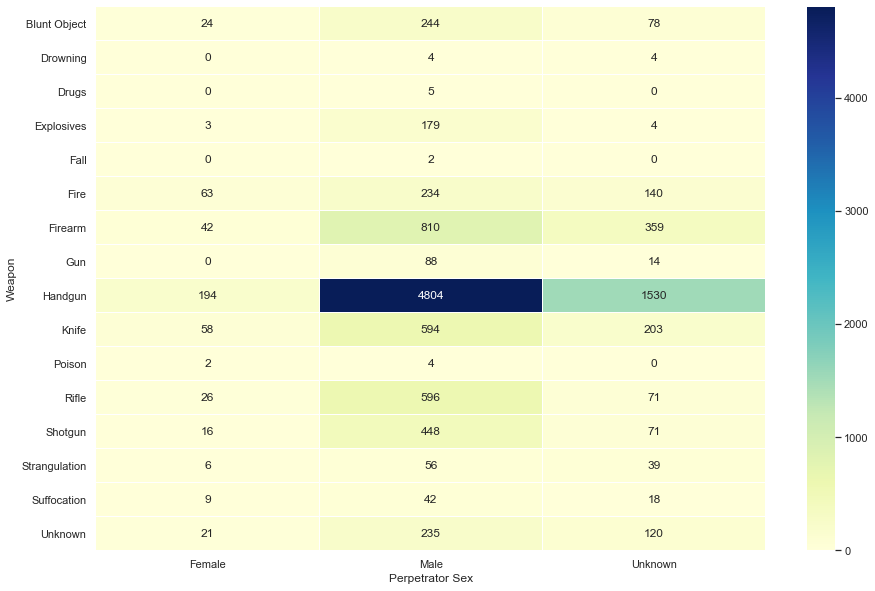

In [248]:
ax = sns.heatmap(tabla,
                 annot=True, 
                 fmt="d",
                 linewidths=0.10,
                 cmap="YlGnBu")

# Framework de visualización

## **¿Que?**

El gráfico de mapa de calor muestra el número de homicidas clasificado por la variable **Sexo del perpetrador** que tiene como categorias masculino, femenino y desconocido, la variable **Arma** que nos indica el arma con la que se cometio el homicidio y tiene como categorias: objeto son filo, asfixia, drogas, rifle, explosivos, caida, fuego, arma de fuego, cuchillo, veneno, estrangulación, ahogo, desconocido. El dataset es de tipo tabla con datos estaticos, ya que cuenta con atributos las cuales son variables categoricas e items que representan los registros por cada caso de homicidio.

* Tipo de Dataset: Tabla

* Tipos de datos: 

 - items 
 
 - Atributos cualitativos


## **¿Por que?**

La gráfica **analiza** y **presenta**, ya que el proposito de la gráfica es **identificar** que armas han sido las más utilizadas por los homicidas y a que genero pertenecen estos, pudiendose observar que las armas de fuego son las mas frecuentes tanto en hombres como en mujeres, seguido de cuchillos y fuego. Por otro lado tambien es fácil reconocer que la mayor cantidad de homicidas suelen ser hombres, aunque cabe aclarar que el género desconcido es bantante cuantiosa y podria albergar cierta cantidad de homicidas femeninas. 

Por otro lado el gráfico además de **identificar** tambien **compara** pues al ser una tabla de conteos es facil hacer comparaciones entre las categorias que como ya se dijo anteriormente para este caso es el genero del homicida y el tipo de arma utilizada en el suceso. En los objetivos de la grafica podemos observar como atributo la correlación ya que la gráfica nos permite observar que caracterias se suelen presentar más junto con otras. 

**1. Actions**

* Analizar: 

 - Consumir: presenta

* Especificas:

 - Buscar: lookup
 - Consulta: Identificar y comparar


**2. Objetivos**

* Atributos: correlación

## ¿Como?

Se evidencia en la visualización que la información se **codifica** de forma **alineada** ya que es tipo tabla y la información esta presentada en el eje y y x de forma alineada y ordenada con respecto al sexo del perpetrador y el arma utilizada, de esta forma se tendrá mejores comparaciones visualmente.

1. Codificar

 * Organización: Alineada
 
 * Map: Color (saturación)

## Marca
La marca implementada en esta gráfica son la **lineas** estas se observan como las divisiones de las categorias de las variables, además se tiene una linea vertical que nos inidica el grado de concentración de las variables.


## Canal
El canal implementado es el de **posición**, **color** y **tamaño** ya que las lineas que separan los valores pertenecientes al cruce de las variables categoricas se presentan tanto vertical como horizontal, formando cuadros, mismos que mediante el canal de color nos dan a conocer el grado de concentración y para esto nos apoyamos en la barra vertical que nos indica que saturación de color representa mas o menos concentración o frecuencia.


## Posibles Mejoras
La posible mejora para esta visualización seria la, mejorar la saturación del color, de forma que sea más fácil notar aquellos colores que son mas claros.

# Temporal

In [25]:
datos2.head()

Agency Code Agency Name       Agency Type       City    State  Year  \
Record ID                                                                       
174           AL00118    Brighton  Municipal Police  Jefferson  Alabama  1980   
175           AL00118    Brighton  Municipal Police  Jefferson  Alabama  1980   
191           AL00201      Mobile  Municipal Police     Mobile  Alabama  1980   
224           AL00201      Mobile  Municipal Police     Mobile  Alabama  1980   
346           AL01800    Cleburne           Sheriff   Cleburne  Alabama  1980   

              Month  Incident              Crime Type Crime Solved Victim Sex  \
Record ID                                                                       
174        December         1  Murder or Manslaughter          Yes       Male   
175        December         1  Murder or Manslaughter          Yes       Male   
191            July         3  Murder or Manslaughter          Yes       Male   
224            July         3  Murder or Manslaughter          Yes       Male   
346         January         1  Murder or Manslaughter           No       Male   

           Victim Age Victim Race Victim Ethnicity Perpetrator Sex  \
Record ID                                                            
174                24       Black          Unknown            Male   
175                18       Black          Unknown            Male   
191                50       White     Not Hispanic            Male   
224                38       White     Not Hispanic            Male   
346                79       White          Unknown         Unknown   

          Perpetrator Age Perpetrator Race Perpetrator Ethnicity  \
Record ID                                                          
174                    22            Black               Unknown   
175                    22            Black               Unknown   
191                    24            White          Not Hispanic   
224                    24            White          Not Hispanic   
346                     0          Unknown               Unknown   

           Relationship   Weapon  Victim Count  Perpetrator Count  \
Record ID                                                           
174        Acquaintance  Shotgun             1                  1   
175        Acquaintance  Shotgun             1                  1   
191            Stranger    Knife             1                  1   
224            Stranger    Knife             1                  1   
346             Unknown  Handgun             3                  1   

          Record Source  
Record ID                
174                 FBI  
175                 FBI  
191                 FBI  
224                 FBI  
346                 FBI

In [278]:
anios = ["2010","2011","2012"]
temporal2 = datos2[ (datos2['Year'].isin(anios)) & (datos2['Crime Solved'] == "Yes")]
temporal2.head()

Agency Code        Agency Name       Agency Type        City  \
Record ID                                                                
565031        AR01801       West Memphis  Municipal Police  Crittenden   
565033        AR01801       West Memphis  Municipal Police  Crittenden   
565061        AR03500          Jefferson           Sheriff   Jefferson   
565062        AR03500          Jefferson           Sheriff   Jefferson   
565115        AR06003  North Little Rock  Municipal Police     Pulaski   

              State  Year    Month  Incident              Crime Type  \
Record ID                                                              
565031     Arkansas  2010      May         2  Murder or Manslaughter   
565033     Arkansas  2010      May         2  Murder or Manslaughter   
565061     Arkansas  2010  January         1  Murder or Manslaughter   
565062     Arkansas  2010  January         1  Murder or Manslaughter   
565115     Arkansas  2010     July         1  Murder or Manslaughter   

          Crime Solved Victim Sex  Victim Age Victim Race Victim Ethnicity  \
Record ID                                                                    
565031             Yes       Male          38       White          Unknown   
565033             Yes       Male          39       White          Unknown   
565061             Yes     Female          99       Black          Unknown   
565062             Yes       Male          59       White          Unknown   
565115             Yes       Male          29       White          Unknown   

          Perpetrator Sex Perpetrator Age Perpetrator Race  \
Record ID                                                    
565031               Male              45            White   
565033               Male              45            White   
565061               Male              18            White   
565062               Male              18            White   
565115               Male              16            Black   

          Perpetrator Ethnicity Relationship        Weapon  Victim Count  \
Record ID                                                                  
565031                  Unknown      Unknown         Rifle             1   
565033                  Unknown      Unknown         Rifle             1   
565061                  Unknown      Unknown  Blunt Object             1   
565062                  Unknown      Unknown  Blunt Object             1   
565115                  Unknown      Unknown       Handgun             1   

           Perpetrator Count Record Source  
Record ID                                   
565031                     1           FBI  
565033                     1           FBI  
565061                     2           FBI  
565062                     2           FBI  
565115                     2           FBI

In [276]:
Conteo_años_2 = pd.pivot_table(temporal2, 
                                values='Victim Count', 
                                index=['Year','Month'], 
                                aggfunc=np.sum)

In [277]:
Conteo_años_2 = pd.DataFrame(Conteo_años_2)
Conteo_años_2.reset_index(inplace=True)
Conteo_años_2 = Conteo_años_2.rename(columns = {'index':'Year','Victim Count':'Valor'})

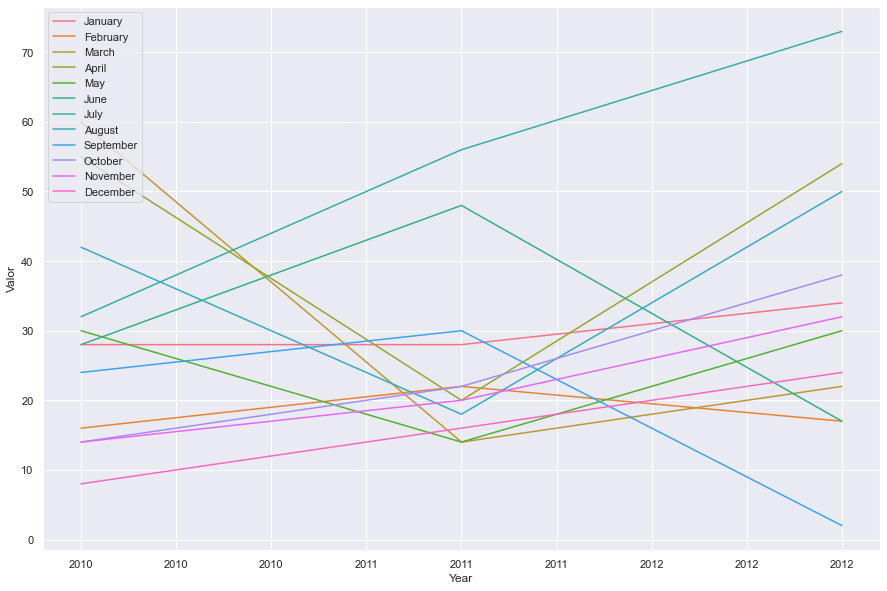

In [274]:
plt.rcParams['figure.figsize']=15,10
sns.lineplot(data=Conteo_años_2, x="Year", y="Valor", hue="Month", 
            hue_order = ['January','February','March','April','May',
                        'June','July','August','September','October','November','December'])
plt.ticklabel_format(style='plain', axis='y')
plt.legend(loc='upper left')
ax = plt.gca()
ax.yaxis.set_major_formatter('{x:1.0f}')
ax.xaxis.set_major_formatter('{x:1.0f}')
plt.show()

# Framework de visualización

## ¿Que?

El gráfico de línea nos da a conocer mes a mes la variación del número de víctimas por asesinato de los años 2010, 2011 y 2012, para esto se utilizó la variable temporal **año** y **mes**, que indica la fecha del homicidio, y la variable **número de víctimas**, que nos indica el número de víctimas en el homicidio para el año y mes correspondiente. El datase es de tipo tabla con datos estáticos, ya que cuenta con atributos de las cuales 2 son variables temporales y 1 es variable cuantitativa, y cuenta con ítems que representan los registros por cada caso de homicidio.

* Tipo de Dataset: Tabla

* Tipos de datos: 

 - items 
 
 - Atributos: 
  
   * tiempo : Atributo ordenado ordinal y ciclico 
   * cuantitativo


## ¿Por que?

La gráfica **Descubre** y **presenta**, ya que el propósito de la gráfica es mostrar y **comparar** como aumento o disminuyó el número de víctimas de homicidios mensualmente para los años 2010, 2011 y 2012, que como se observa el número de víctimas para junio estuvo aumentando para cada año y para 2011 y 2012 este mes fue el que más número víctimas de homicidio presento, por otro lado también se observa que los meses de marzo y abril para el año 2010 tienen mayor número de víctimas por homicidio y para el año siguiente (2011) este número disminuye considerablemente, sin embargo estos vuelven a subir para el año 2012 donde se catalogan en los meses con mayor cantidad de víctimas. estuvo entre 50 y 60 es uno de los meses. 

En los objetivos del gráfico además de **comparar** también **identifica** y **localiza** pues las líneas de tiempo al interceptar la línea de años logra facilitar la identificación de datos atipicos, además el objetivo en los atributos es la **similaridad** o **comparación** de las tendencias de la variable número de víctimas a través del tiempo.


**1. Actions**

* Analizar: 

 - Consumir: Descubrir y presentar

* Especificas:

 - Buscar: localizar
 - Consulta: Identificar y comparar


**2. Objetivos**

* Atributos: similaridad

## ¿Como?

Se evidencia en la visualización que la información se **codifica** de forma **ordenada** ya que es tipo tabla y los atributos son temporales, la información esta presentada en el eje y y x de forma separada y ordenada con respecto al mes y al año respectivamente en cual se presentó el suceso, también se tiene que la faceta del gráfico es sobreponer, pues vemos que son varia líneas de tiempo que se sobreponen unas a otras en diferentes puntos.

1. Codificar

 * Organización: ordenada
 
 * Map: Color (Hue)
 
2. Facet

 * Sobreponer

## Marca
La marca implementada en esta gráfica son la **líneas** estas se observan como la líneas de tiempo cada una perteneciente a un mes de año, las cuales nos indican la  variación del número de víctimas por homicidio a través del tiempo, también las vemos en la etiqueta como guía para encontrar el mes que le corresponde a cada línea de tiempo.


## Canal
El canal implementado es el de **posición**, **color** y **tamaño** ya que las líneas de tiempo se presentan de forma horizontal y con un color diferente para cada una, al igual que la de las etiquetas que nos indican que color representa cada mes. Por otro lado, también tenemos el canal de posición vertical para la cantidad de víctimas y horizontal para la variable de tiempo **año**.


## Posibles Mejoras
La posible mejora para esta visualización seria la cambiar el color de las marcas de las líneas, ya que no es tan fácil identificar el color para cada mes, debido a que los colores suelen ser muy parecidos, también dejar una única línea vertical para el año en cuestión.

# Espacial

El proceso se hizo en **Colaboratory** , pero se trae aqui en codigo para revisión, adjunto link de codigo.
https://colab.research.google.com/drive/1Ri3_MRcQfxdRmmCaJ3bByxuCL7QvyUzC#scrollTo=OsV8bjmSbG8i

In [23]:
%matplotlib inline
import pandas as pd
#import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
#from geopy.geocoders import Nominatim
import time
import math

In [ ]:
## Crear un objeto nominatin
geo = Nominatim(user_agent="Homicidio")

In [ ]:
## Valores unicos de los estados
Estados = pd.unique(crimenes['State'])
Estados

In [ ]:
## Se saca la latitud y longitud de cada estado y se crea un dataframe con esto vectores
Longitud = []
Nombre_estados= []
Pais= []
for i in Estados:
  loc = geo.geocode(i + ', United States')
  Latitud.append(loc.latitude)
  Longitud.append(loc.longitude)
  Nombre_estados.append(i)
  Pais.append(loc)

## Data frame
auxiliar= pd.DataFrame()
#"Nombre_estados","Pais","Latitud","Longitud"
auxiliar["State"]= Nombre_estados
auxiliar["Nombres_pais"]= Pais
auxiliar["latitud"]= Latitud
auxiliar["longitud"]= Longitud

In [ ]:
#Se unen los dos dataframe por la columna "State"
crimenes=crimenes.merge (auxiliar, on = 'State', how = 'left')
crimenes.head()

In [ ]:
# Se divide la base esocgiendo aquellos registros que pertenzecan a los años del 2010 al 2014 y 
#que tengan los criemnes resueltos

anios = ["2010","2011","2012","2013","2014"]
crimenes2 = crimenes[ (crimenes['Year'].isin(anios)) & (crimenes['Crime Solved'] == "Yes")]
crimenes2.head()

In [ ]:
## Se realiza el gráfico de mapa de burbujas
import plotly.graph_objects as go
px.set_mapbox_access_token("pk.eyJ1IjoibHV6cm9kcmlndWV6IiwiYSI6ImNrbm0yOXByazBteTkydnB1M2dtMnM2aXEifQ.5FGWOHOga_tW8dQGcFjDEw")


fig = px.scatter_mapbox(crimenes2,
                        lat='latitud',
                        lon='longitud',
                        hover_name='State',
                        zoom=4,
                        color="State",
                        size="Incident",
                        animation_frame="Year", 
                        center = {"lat": 35.204888, "lon": -92.447911})
fig.update_layout(
        title_text = 'Numero de incidentes de homicidio desde 2010 al 2014 en Estados Unidos',
        showlegend = True,
        geo = dict(
            scope = 'north america',
            landcolor = 'rgb(217, 217, 217)',
        )
    )
fig.show()

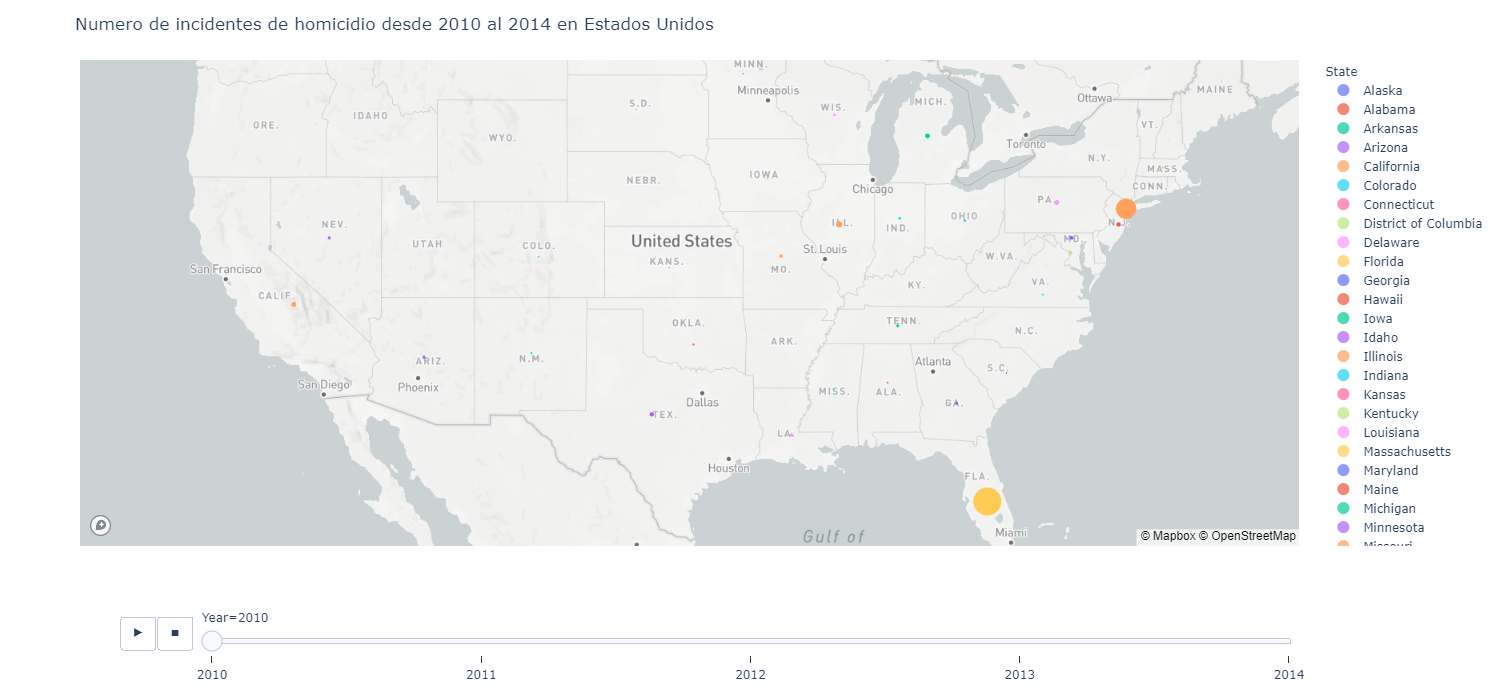

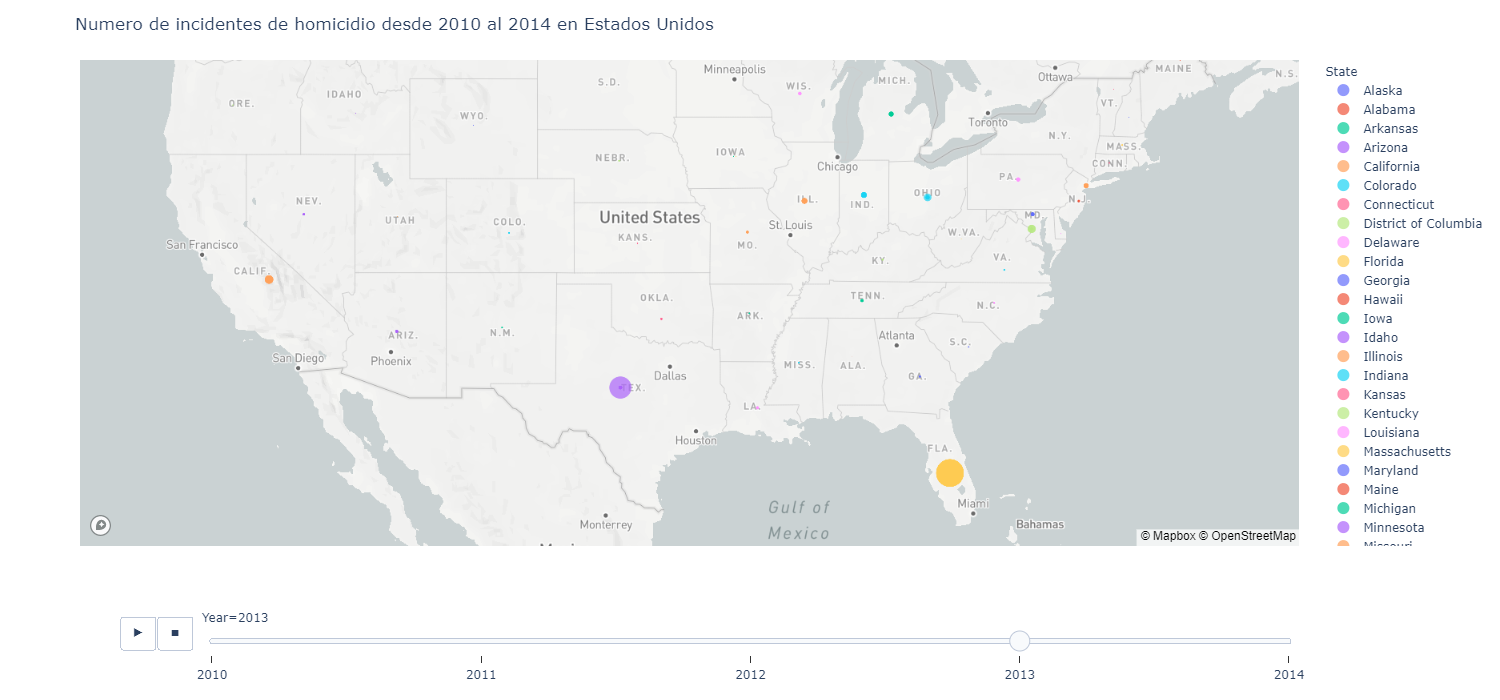

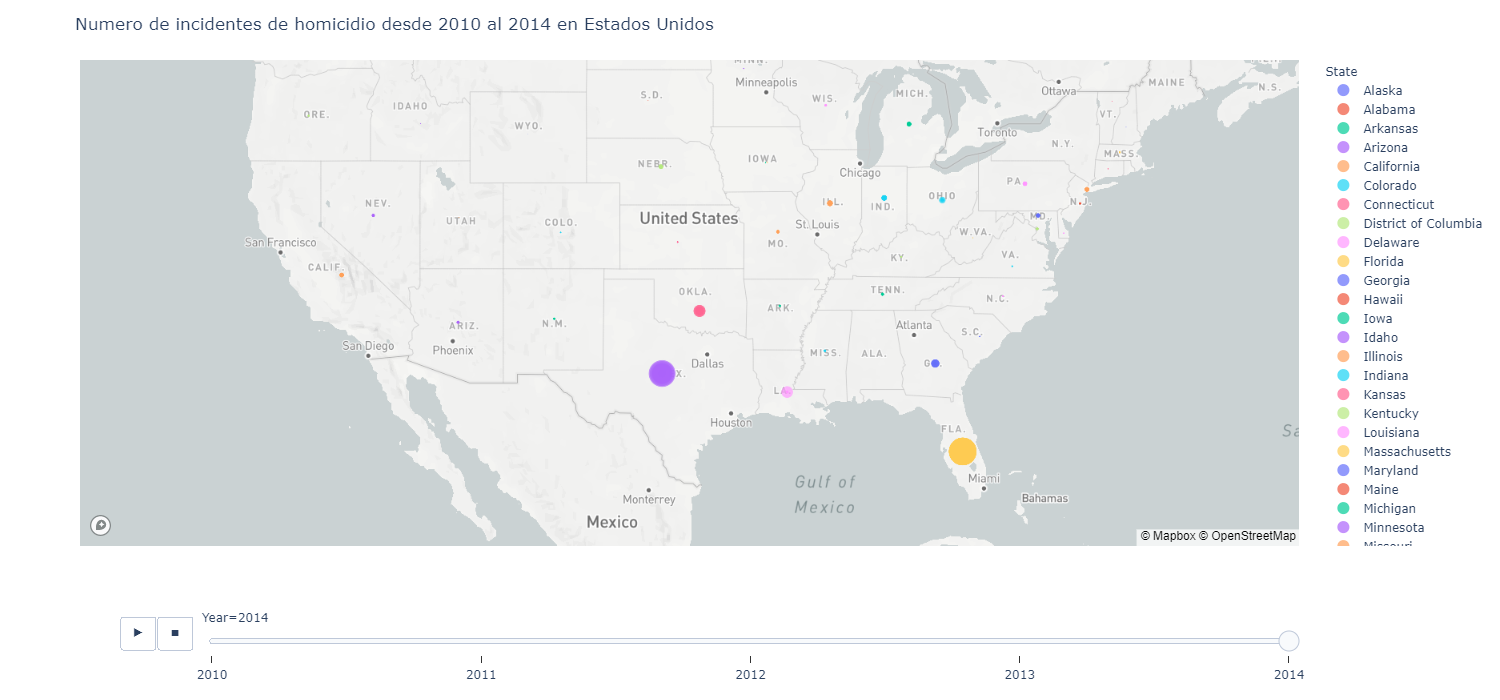

# Framework de visualización

## ¿Que?

El gráfico mapa de burbujas nos da a conocer el número de incidentes de asesinato en los años del 2010 al 2014, para esto se utilizó la variable temporal **año**, que indica la fecha del homicidio, la variable numérica **Incidentes**, que nos indica el número de casos de homicidio que para los años ya mencionados, y finalmente la variable categórica **Estado** que nos da el nombre de cada estados donde se presentó el homicidio. El datase es de tipo geometría con datos estáticos, ya que cuenta con ítems que son todos los reportes de asesinatos y los datos de posición que los encontramos en la variable **Estado**.

* Tipo de Dataset: Geometria

* Tipos de datos: 

 - Items
 - Posición

## ¿Por que?

Para este gráfico si se requiere transformación de los datos, ya que, para ubicar en el mapa, los estados en los que se cometen crímenes de asesinato, fue necesario incluir dos variables (Latitud y Longitud) las cuales derivaron de la variable **State**  

Por otro lado, el gráfico de **Descubre** y **presenta**, ya que el propósito de la gráfica es mostrar en que estados hubo incidentes de homicidios y con que frecuencia, además nos muestra la variación de este desde el año 2010 al 2014, por lo tanto, se observa que para el 2011 el estado de florida y Nueva York son los que más presentan incidentes de homicidios, sin embargo, se ven casos en Texas, California, Michigan, entre otros. Así mismo para los 2011 y 2012 se tiene que Florida sigue siendo el estado con más homicidios, para el 2013 se observa un incremento de casos en el estado de Texas, pero no superando a florida, finalmente en el 2014 se tiene a florida como el que más homicidios reporta, seguido Texas, Oklahoma y de Louisiana. 

Los objetivos del gráfico son **identificar** y **localizar** ya que el gráfico contiene burbujas que dan a conocer la ubicación es decir el estado, junto con el número de incidentes de homicidio, también podemos decir que otro objetivo es **comparar** pues se puede ver lo anterior para cada año (2010-2014).


**1. Actions**

* Analizar: 

 - Consumir: Descubrir y presentar

* Especificas:

 - Buscar: localizar
 - Consulta: Identificar y comparar


**2. Objetivos**

* Datos espaciales: Forma

## ¿Como?

Se evidencia en la visualización que la información **codifica** **Uso** ya que es de tipo geometria y tenemos posiciones, , también se tiene que **codifica** en mapa y que presenta **color** como **matiz**, **tamaño** y **forma** para las burbujas que identifican de los estados y la frecuencia de numero de homicidios. 

1. Codificar

 * Organización: uso
 
 * Map: 
 
     - Color (Matiz)
     - Tamaño
     - Forma
 
2. Manipular

 * Seleccionar
 * Navegar

## Marca
La marca implementada en esta visualización es de puntos ya que con estos se expresa la cantidad de homicidios y el estado en que ocurrio.

## Canal
El canal implementado es el de color y tamaño ya que con estos se pueden identificar los Estados y la frecuencia de incidentes, esto con el fin de diferenciarlos en el mapa.

## Posibles Mejoras
La posible mejora para esta visualización seria que los estados en el mapa tuvieran su propio color y mas bien utilizar las etiquetas para clasificar por raza o etnia del perpetrador.

# Visualizaciones Freddy Andres Martinez
## Multivariado

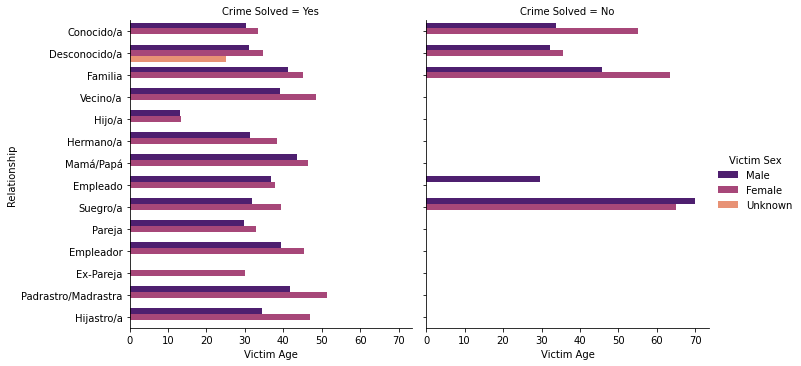

In [38]:
datos2.Relationship.replace({"Stepson":"Stepdaughter","Unknown":"Stranger","Ex-Husband":"Ex-Wife","Stepfather":"Stepmother","Common-Law Husband":"Common-Law Wife",
                            "Son":"Daughter","Husband":"Wife","Friend":"Acquaintance","Boyfriend/Girlfriend":"Wife","Common-Law Wife":"Wife", "Brother":"Sister",
                             "Mother":"Father"},inplace=True)
datos2.Relationship.replace({"Stranger":"Desconocido/a","Acquaintance":"Conocido/a","Daughter":"Hijo/a","Wife":"Pareja","Father":"Mamá/Papá","Family":"Familia",
                             "Neighbor":"Vecino/a","Sister":"Hermano/a","In-Law":"Suegro/a","Stepdaughter":"Hijastro/a","Ex-Wife":"Ex-Pareja",
                             "Stepmother":"Padrastro/Madrastra","Employer":"Empleador","Employee":"Empleado","Common-Law Wife":"Pareja"},inplace=True)

sns.catplot(data = datos2,
            kind = "bar",
            estimator = np.mean,
            x = "Victim Age", 
            y = "Relationship",
            hue = "Victim Sex",
            col = "Crime Solved",
            palette = 'magma',
            ci = None)

## ¿Qué?
* Como ya fue mencionado dentro de la descripción, la VIS tiene como objetivo el análisis de cuatro variables donde en este caso se compara la relación que tiene la victima con el victimario, el promedio de edad de la victima, sexo de la victima y estado del crimen (solucionado o no solucionado), este tipo de dataset es de barras donde se relacionan sus ítems en cuanto a sus atributos donde el conjunto de datos es estático y nos dice a través de esa unión de características los niveles cuantitativos y también mediante la ayuda visual y diferencia de colo nos hace interpretar y revelar claramente las situaciones expuestas dentro del contexto.

## ¿Por qué?
* Como bien se dijo en la descripción el usuario requiere ver el tipo de acción que tienen las autoridades contra la violencia es por eso que se enfoca esta visualización al tipo de presentacióndonde nos describe como derivan la correlación o para ser más preciso el tipo de dependencia de estas cuatro variables es por eso que el tipo de consulta resulta siendo una especie de resumen.

## ¿Cómo?
* La codificación visual que utiliza esta pieza es un arreglo express donde muestra datos con el fin de descubrir la ditribucion de cada concepto numéricos puntuales donde también utiliza diferentes subcaracteristicas y a través del cambio de color nos muestran la frecuencia según las características contrarrestadas.

## Marca:
* El tipo de marca que tiene esta visualización es de linea donde nos muestra según la posicion el nivel de frecuencia que hay.

## Canal : 
* En cuanto a este ítem la pieza proporciona tres tipos de colores de saturación claros donde nos muestra el sexo de la victima, y se encuentran dos ejes o dos canales de posicion espacial tanto vertical como horizontal donde en una nos muestra la relacion que tiene el victimario con la victima y en otro el promedio en años de la victima.

## Mejoras Posibles: 
* La pieza deberia mejorar el concepto en nivel de ejes pues en el eje x deberia poner en ves de promedio de edad el promedio de casos hechos por el victimario cualquiera que sea, solo que la base no tenia esos terminos cuantitativos y era un poco tedioso para sacar por eso falla en su efectividad que es lo mas importante en cuanto a las visualizaciones.

# Temporal

In [40]:
import joypy
from matplotlib import pyplot as plt
from matplotlib import cm
datos2.Month.replace({"January":1,"February":2,"March":3,"April":4,"May":5,"June":6,
                      "July":7,"August":8,"September":9,"October":10,"November":11,"December":12},inplace=True)
datos2.Month.value_counts()

4     1113
1     1081
7     1058
6      938
8      930
9      929
12     919
10     919
5      914
3      904
11     878
2      877
Name: Month, dtype: int64

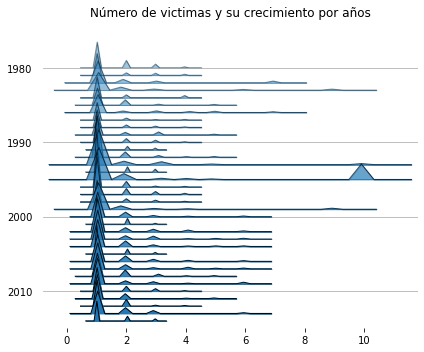

In [42]:
%matplotlib inline

labels=[y if y%10==0 else None for y in list(datos2.Year.unique())]
fig, axes = joypy.joyplot(datos2, by="Year", column="Victim Count", labels=labels, range_style='own', 
                          grid="y", linewidth=1, legend=False, fade=True, figsize=(6,5),
                          title="Número de victimas y su crecimiento por años",
                          kind="counts", bins=30)

## ¿Qué?
* Para la realización del gráfico se hace uso de un grafico temporal con atributos de diferentes tipos: Año que es la principal y por otro lado se encuentra conteo de victimas en caso del JOYPLOT, en cambio en el otro se evidencia el tipo de crimen junto a la edad de la victima.

## ¿Por qué?
* Con esto lo que se quiere implementar es la busqueda la comparación e identificación a partir de las tendencias cuales años fueron los mas duros a nivel de criminalidad y violencia.

## ¿Cómo?
* La codificación visual que utiliza esta pieza es un arreglo express donde muestra datos numéricos puntuales donde también utiliza diferentes subcaracteristicas y a través de la saturación nos muestran y delimitan la frecuencia según las características contrarrestadas.

## Marca:
* El tipo de marca que tiene esta visualización es de área y lineas donde nos muestra a nivel numérico y de color el nivel volumen o crecimiento o delimitación de tendencia que tiene dicha variable durante el espacio de tiempo.

## Canal :
* Canales de Posición Vertical dado por la CANTIDA DE VICTIMAS y la Posición Horizontal dado la AÑO.

## Reglas Generales y Mejoras 
* La pieza tiene una justificación adecuada donde representa de forma sobresaliente los datos, de forma cognitiva y de percepción tiene una armonía adecuada pero es importante adaptar mejor los datos para que compla el concepto de forma que es el mas importante en la vis.

# Espacial

In [19]:
datos2["lat"] = datos2["State"]
datos2["lon"] = datos2["State"]
datos2.head()

Agency Code Agency Name       Agency Type       City    State  Year  \
Record ID                                                                       
174           AL00118    Brighton  Municipal Police  Jefferson  Alabama  1980   
175           AL00118    Brighton  Municipal Police  Jefferson  Alabama  1980   
191           AL00201      Mobile  Municipal Police     Mobile  Alabama  1980   
224           AL00201      Mobile  Municipal Police     Mobile  Alabama  1980   
346           AL01800    Cleburne           Sheriff   Cleburne  Alabama  1980   

              Month  Incident              Crime Type Crime Solved Victim Sex  \
Record ID                                                                       
174        December         1  Murder or Manslaughter          Yes       Male   
175        December         1  Murder or Manslaughter          Yes       Male   
191            July         3  Murder or Manslaughter          Yes       Male   
224            July         3  Murder or Manslaughter          Yes       Male   
346         January         1  Murder or Manslaughter           No       Male   

           Victim Age Victim Race Victim Ethnicity Perpetrator Sex  \
Record ID                                                            
174                24       Black          Unknown            Male   
175                18       Black          Unknown            Male   
191                50       White     Not Hispanic            Male   
224                38       White     Not Hispanic            Male   
346                79       White          Unknown         Unknown   

          Perpetrator Age Perpetrator Race Perpetrator Ethnicity  \
Record ID                                                          
174                    22            Black               Unknown   
175                    22            Black               Unknown   
191                    24            White          Not Hispanic   
224                    24            White          Not Hispanic   
346                     0          Unknown               Unknown   

           Relationship   Weapon  Victim Count  Perpetrator Count  \
Record ID                                                           
174        Acquaintance  Shotgun             1                  1   
175        Acquaintance  Shotgun             1                  1   
191            Stranger    Knife             1                  1   
224            Stranger    Knife             1                  1   
346             Unknown  Handgun             3                  1   

          Record Source      lat      lon  
Record ID                                  
174                 FBI  Alabama  Alabama  
175                 FBI  Alabama  Alabama  
191                 FBI  Alabama  Alabama  
224                 FBI  Alabama  Alabama  
346                 FBI  Alabama  Alabama

In [20]:
datos2.lon.replace({"California"        :      -119.7512600,
"Texas"              :     -92.2890400,
"Florida"            :     -74.3568200,
"Michigan"           :     -98.1170500,
"North Carolina"     :     -80.84313,
"Pennsylvania"       :     -75.1637900,
"Ohio"               :     -83.0187900,
"Louisiana"          :     -91.0515300,
"Virginia"           :     -75.97799,
"New York"           :     -74.00597,
"Georgia"            :     -83.5001800,
"Arizona"            :     -112.07404,
"Missouri"           :     -90.19789,
"Tennessee"          :     -86.78444,
"Indiana"            :     -86.15804,
"South Carolina"     :     -79.9309200,
"Maryland"           :     -76.61219,
"Illinois"           :     -87.65005,
"New Jersey"         :     -74.07764,
"Washington"         :     -77.03637,
"Oklahoma"           :     -97.51643,
"Colorado"           :     -104.9847,
"Arkansas"           :     -92.28959,
"Kentucky"           :     -84.47772,
"Nevada"             :     -116.7511900,
"Wisconsin"          :     -89.40123,
"Massachusetts"      :     -71.05977,
"New Mexico"         :     -106.65114,
"Mississippi"        :     -89.52229,
"Connecticut"        :     -72.6850900,
"West Virginia"      :     -106.4823200,
"Kansas"             :     -94.57857,
"Minnesota"          :     -93.26384,
"Utah"               :     -111.89105,
"Oregon"             :     -122.67621,
"Iowa"               :     -91.53017,
"District of Columbia" :   -77.03637,
"Alabama"            :     -95.712891,
"Idaho"              :     -112.03414,
"Montana"            :     -109.7510200,
"Alaska"             :     -107.7494800,
"Maine"              :     -95.712891,
"Delaware"           :     -75.4999200,
"Nebraska"           :     -95.8525000,
"Rhodes Island"      :     -71.4128300,
"Vermont"            :     -90.4279000,
"New Hampshire"      :     -71.4675700,
"South Dakota"       :     -96.7003300,
"North Dakota"       :     -96.7898000,
"Hawaii"             :     -157.8583300,
"Wyoming"            :     -107.5009000},inplace = True)

datos2.lat.replace({"California"        :      37.2502200,
"Texas"              :     35.3236900,
"Florida"            :     41.3317600,
"Michigan"           :     48.0250000,
"North Carolina"     :     35.22709,
"Pennsylvania"       :     39.9523300,
"Ohio"               :     39.9961800,
"Louisiana"          :     39.4489400,
"Virginia"           :     36.85293,
"New York"           :     40.71427,
"Georgia"            :     32.7504200,
"Arizona"            :     33.44838 ,
"Missouri"           :     38.62727,
"Tennessee"          :     36.16589,
"Indiana"            :     39.76838,
"South Carolina"     :     32.7765700,
"Maryland"           :     37.09024,
"Illinois"           :     41.85003 ,
"New Jersey"         :     40.72816,
"Washington"         :     38.89511 ,
"Oklahoma"           :     35.46756,
"Colorado"           :     39.73915 ,
"Arkansas"           :     34.74648,
"Kentucky"           :     37.98869,
"Nevada"             :     39.2502100,
"Wisconsin"          :     43.07305,
"Massachusetts"      :     42.35843,
"New Mexico"         :     35.08449,
"Mississippi"        :     32.03349,
"Connecticut"        :     41.7637100,
"West Virginia"      :     31.7685700,
"Kansas"             :     39.09973,
"Minnesota"          :     44.97997,
"Utah"               :     40.76078,
"Oregon"             :     45.52345,
"Iowa"               :     41.66113,
"District of Columbia" :   38.89511,
"Alabama"            :     37.09024,
"Idaho"              :     43.46658,
"Montana"            :     47.0002500,
"Alaska"             :     33.4320100,
"Maine"              :     37.09024,
"Delaware"           :     39.0003900,
"Nebraska"           :     40.6702800,
"Rhodes Island"      :     41.8239900,
"Vermont"            :     40.2942100,
"New Hampshire"      :     42.7653700,
"South Dakota"       :     43.5499700,
"North Dakota"       :     46.8771900,
"Hawaii"             :     21.3069400,
"Wyoming"            :     43.0002400},inplace=True)


In [21]:
px.set_mapbox_access_token("pk.eyJ1Ijoia2FyZW5yb2phcyIsImEiOiJja25tMmw3OWQwbXl6MnBvNTdjam5xdW9jIn0.GkuAPjGFBNUEvZcZ8_-uTw")

fig = px.scatter_mapbox(datos2, 
                        lat="lat", 
                        lon="lon",
                        hover_name="City",     
                        color="Victim Count", 
                        size="Victim Count",
                        animation_frame='Month',
                        color_continuous_scale=px.colors.sequential.Oranges,
                        zoom=3,title="Cantidad de victimas acumulados mes ")
fig.show()

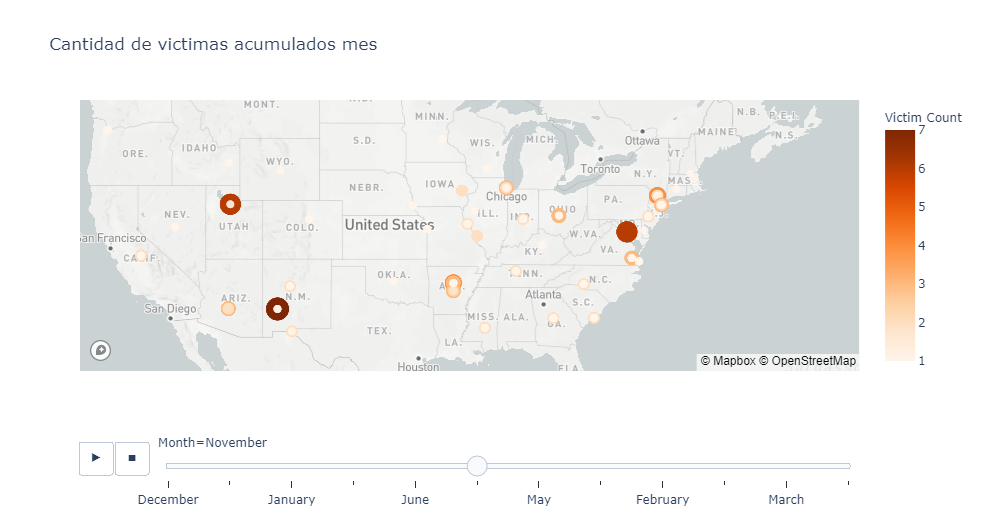

In [33]:
from IPython.display import Image
Image("C:/Users/David Benavides/Documents/Visualización de datos/Vis_espacial_freddy.png")

## ¿Qué?
* Esta visualización es referenciada a travez de un dataset con información de geometría geográfica, con posiciones dadas por la latitud y longitud de cada una de las ciudades de Estados Unidos que se perpetuaron los diferentes tipos de violencia, este es contrarestado con un atributo de cuantitativo que nos muestra en cantidades el número de casos de violencia según el Estado.

## ¿Por qué?
* Como bien se dijo en la descripción el usuario requiere ver el tipo de acción que tiene los diferentes tipos de violencia y poder identificar a travez de las coordenadas geográficas de las ciudades de Estados Unidos y la información contenida buscando las ciudades o estados donde se encuentra mas critico los ataques de violencia.

## ¿Cómo? 
* La codificación visual que utiliza esta pieza es un arreglo express donde muestra datos numéricos puntuales donde también utiliza diferentes subcaracteristicas y a través del tamaño nos muestran la frecuencia según las características contrarrestadas.

## Marca:
* El tipo de marca que tiene esta visualización es de marcas de puntos para representar las coordenadas geográficas de las ciudades de Estados Unidos, según cada Estado va expandiendo o ajustando su intensidad segun sea la frecuencia.

## Canal :
* En cuanto a este ítem la pieza proporciona colores de saturación claros donde tambien encontramos una cingularidad en los puntos donde se expanden o se ajustan.

## Mejoras Posibles:
* Una de las mejoras posibles podría ser que al presentar el mapa solo se encuentre sectorizada la region de estados unidos sin que se muestre el mar y demas partes de paises fronterizos, trabajando un poco mejor con los colores.